In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/product-sales-data/statsfinal.csv


**Let's Analyz and find following**
* Is there any trend in the sales of all four products during certain months?
* Out of all four products , which product has seen the highest sales in all the given years?
* The company has all it's retail centers closed on the 31st of December every year. Mr: Hariharan , the CEO , would love to get an estimate on no: of units of each product that could be sold on 31st of Dec , every year , if all their retail centers were kept open.
* The CEO is considering an idea to drop the production of any one of the products. He wants you to analyze this data and suggest whether his idea would result in a massive setback for the company. 
* The CEO would also like to predict the sales and revenues for the year 2024. He wants you to give a yearly estimate with the best possible accuracy.

* Can you help REC corp with your analytical and data science skills ?
> NOTE: This is a hypothetical dataset generated using python for educational purposes. It bears no resemblance to any real firm. Any similarity is a matter of coincidence

### Loading Dataset

In [20]:
#if you open in Kaggle editor
data = pd.read_csv('/kaggle/input/product-sales-data/statsfinal.csv')

In [21]:
data.head(-1)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...,...
4594,4594,29-01-2023,1227,3044,5510,1896,3889.59,19298.96,29864.20,13518.48
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62


In [22]:
data.shape

(4600, 10)

In [23]:
data.columns

Index(['Unnamed: 0', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2',
       'S-P3', 'S-P4'],
      dtype='object')

**Observation**
* column "uamed:0" is having unique key so no use
* data strat from 13-6-2010 and end at 02-02-23 so we have both years incomplete data 
* we have Each products sales and revenve with day,month and year

In [24]:
#droping useless data
data=data.drop(columns=['Unnamed: 0'])

In [26]:
# split data colum so we can drop 2010 and 2023 data for incomplete data
data['Day'] =data['Date'].apply(lambda x:x.split('-')[0])
data['Month']=data['Date'].apply(lambda x:x.split('-')[1])
data['Year']=data['Date'].apply(lambda x:x.split('-')[2])

In [28]:
#droping Data from 2010 and 2023
data = data.drop(index=data[(data['Year'] == '2010') | (data['Year'] == '2023')].index)


In [29]:
data.head(-1)

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
201,01-01-2011,281,3956,4186,1537,890.77,25081.04,22688.12,10958.81,01,01,2011
202,02-01-2011,7665,1350,4266,1789,24298.05,8559.00,23121.72,12755.57,02,01,2011
203,03-01-2011,937,3758,4311,314,2970.29,23825.72,23365.62,2238.82,03,01,2011
204,04-01-2011,6378,968,4530,995,20218.26,6137.12,24552.60,7094.35,04,01,2011
205,05-01-2011,731,2174,5908,1505,2317.27,13783.16,32021.36,10730.65,05,01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
4560,25-12-2022,456,2530,3333,570,1445.52,16040.20,18064.86,4064.10,25,12,2022
4561,26-12-2022,7600,662,4510,988,24092.00,4197.08,24444.20,7044.44,26,12,2022
4562,27-12-2022,7114,2948,681,700,22551.38,18690.32,3691.02,4991.00,27,12,2022
4563,28-12-2022,7759,356,1834,1142,24596.03,2257.04,9940.28,8142.46,28,12,2022


In [48]:
data['Total Sales'] = data['Q-P1'] + data['Q-P2'] + data['Q-P3'] + data['Q-P4']
data['Total Revenue'] = data['S-P1'] + data['S-P2'] + data['S-P4'] + data['S-P4']

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year,Total Sales,Total Revenue
201,01-01-2011,281,3956,4186,1537,890.77,25081.04,22688.12,10958.81,01,01,2011,9960,47889.43
202,02-01-2011,7665,1350,4266,1789,24298.05,8559.00,23121.72,12755.57,02,01,2011,15070,58368.19
203,03-01-2011,937,3758,4311,314,2970.29,23825.72,23365.62,2238.82,03,01,2011,9320,31273.65
204,04-01-2011,6378,968,4530,995,20218.26,6137.12,24552.60,7094.35,04,01,2011,12871,40544.08
205,05-01-2011,731,2174,5908,1505,2317.27,13783.16,32021.36,10730.65,05,01,2011,10318,37561.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,26-12-2022,7600,662,4510,988,24092.00,4197.08,24444.20,7044.44,26,12,2022,13760,42377.96
4562,27-12-2022,7114,2948,681,700,22551.38,18690.32,3691.02,4991.00,27,12,2022,11443,51223.70
4563,28-12-2022,7759,356,1834,1142,24596.03,2257.04,9940.28,8142.46,28,12,2022,11091,43137.99
4564,29-12-2022,6457,1851,3369,669,20468.69,11735.34,18259.98,4769.97,29,12,2022,12346,41743.97


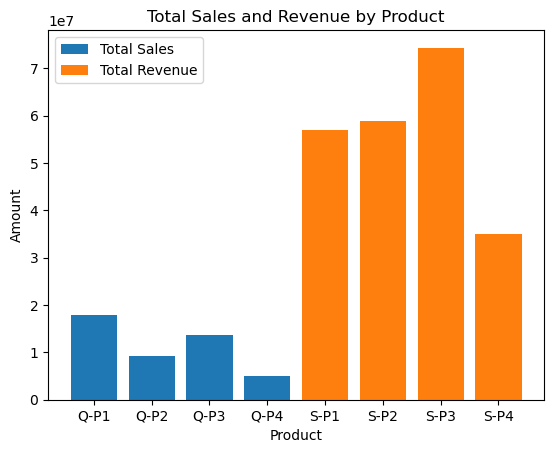

In [35]:
# bar chart of total sales and revenue by product
product_sales = data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum()
product_revenue = data[['S-P1', 'S-P2', 'S-P3', 'S-P4']].sum()
plt.bar(['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'], product_sales, label='Total Sales')
plt.bar(['S-P1', 'S-P2', 'S-P3', 'S-P4'], product_revenue, label='Total Revenue')
plt.legend()
plt.xlabel('Product')
plt.ylabel('Amount')
plt.title('Total Sales and Revenue by Product')
plt.show()

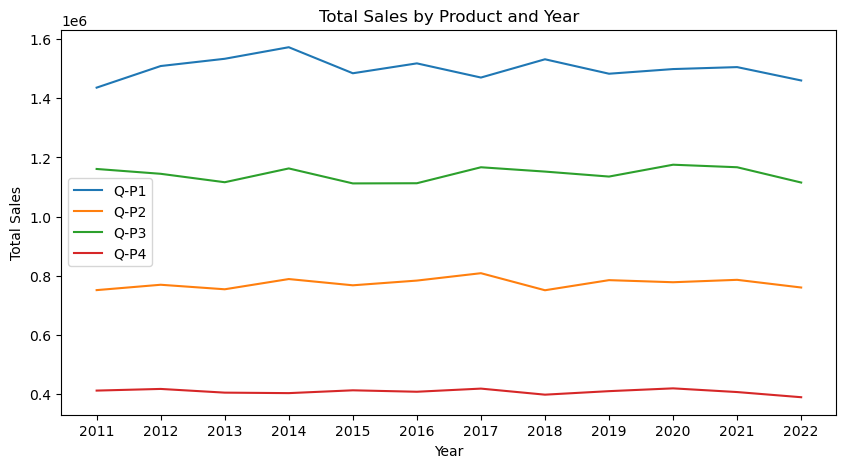

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

# iterate over each product and plot its total sales by year
for product in ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']:
    product_sales = data.groupby('Year')[f'Q-P{product[-1]}'].sum()
    ax.plot(product_sales.index, product_sales.values, label=product)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Product and Year')

plt.show()

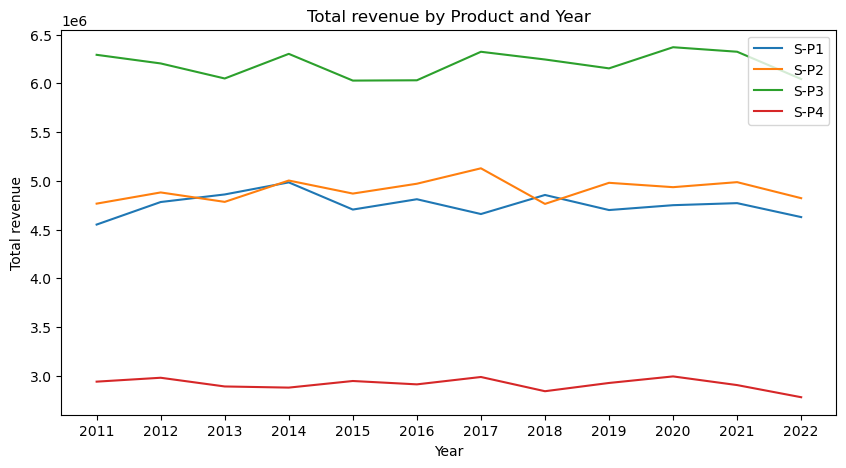

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))

# iterate over each product and plot its total revenue by year
for product in ['S-P1', 'S-P2', 'S-P3', 'S-P4']:
    product_sales = data.groupby('Year')[f'S-P{product[-1]}'].sum()
    ax.plot(product_sales.index, product_sales.values, label=product)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Total revenue')
ax.set_title('Total revenue by Product and Year')

plt.show()